<a href="https://colab.research.google.com/github/janpeter19/BPL_CHO_Perfusion/blob/main/Notes_BPL_CHO_Perfusion_cspr_opennloop_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_CHO_Fedbatch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_CHO_Fedbatch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-05-17 07:06:29--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’

Miniconda3-py312_24 100%[===================>] 136.71M   152MB/s    in 0.9s    

2024-05-17 07:06:30 (152 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.5.0               |  py312h06a4308_0         1.2 MB
    frozendict-2.4.2           |  py312h06a4308_0          36 KB
    openssl-3.0.13             |       h7f8727e_1         5.2 MB
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

  frozendict         pkgs/main/linux-64::frozendict-2.4.2-py312h06a4308_0 

The following packages will be UPDATED:

  conda                              24.3.0-py312h06a4308_0 --> 24.5.0-py312h06a4308_0 
  openssl                                 3.0.13-h7f8727e_0 --> 3.0.13-h7f8727e_1 



openssl-3.0.13       

In [ ]:
!conda --version
!python --version

conda 24.5.0
Python 3.12.2


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fmpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    abseil-cpp-20211102.0      |       h27087fc_1         1.1 MB  conda-forge
    anyio-4.3.0                |     pyhd8ed1ab_0         100 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_0          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|  py312h98912ed_4          34 KB  conda-forge
    arrow-1.3.0                |     pyhd8ed1ab_0          98 KB  conda-forge
    arrow-cpp-14.0.2           |       h374c478_1        11.7 MB
    asttokens-2.4.1            |     pyh

In [ ]:
#!conda install matplotlib --yes

In [ ]:
#!conda install scipy --yes

In [ ]:
#!conda install openpyxl --yes

In [ ]:
#!conda install xlrd --yes

# BPL_CHO_Perfusion_cspr_openloop setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_CHO_Perfusion_cspr_openloop_linux_om_me.fmu
* Setup-file - BPL_CHO_Perfusion_cspr_openloop_fmpy_explore

In [ ]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow
import warnings
warnings.filterwarnings("ignore")

In [1]:
%%bash
git clone https://github.com/janpeter19/BPL_CHO_Perfusion

Cloning into 'BPL_CHO_Perfusion'...
fatal: could not read Username for 'https://github.com': No such device or address


CalledProcessError: Command 'b'git clone https://github.com/janpeter19/BPL_CHO_Perfusion\n'' returned non-zero exit status 128.

In [2]:
%cd BPL_CHO_Perfusion

[Errno 2] No such file or directory: 'BPL_CHO_Perfusion'
/content


# BPL_CHO_Fedbatch - demo

Author: Jan Peter Axelson

This notebook deals with CHO fedbatch cultivation and recombinant protein production is included. First we make a check of the model by comparing a simulation result with corresponding published diagram. Then we take a closer look at the start-up strategy to keep the by-product formation low. After that we investigate at a whole cultivation and see the impact of feeding strategy on both cell growth and protein production where a trade-off is needed in this case.

The model used takes its inspiration from the microbial bottleneck models as described in the original papers [1] and [2] and reformulated and studied in [3]. The laboratory cultures used for model validation in [1] did produce MAb (against part of IgG) but no MAb-data was presented. The paper focus on viable and non-viable cell concentrations only. The original model is in section 5 expanded with the classical empirical Luedeking-Piret model recombinant protein production, see chapter 5 in [4]. In this way can get more insight into choice of feeding profile.

Interaction with the compiled model as FMU is mainly through the simplified commands: par(), init(), newplot(), simu() etc. The last simulation is always available in the workspace and called 'sim_res'. The command describe() brings mainly up description infomration from the actual Modelica code from the FMU but is complemented with information given in the dedicated Python setup-file.

The idea here is to demonstrate how simulations and varyiing conditions can provide some process insight that can support the experimental work. I hope that at the end of this session you are ready to formulate your own questions you want to address with simulations - and you can just go on in this notebook! Just press the field "+Code" in the upper left part of notebook interface and you get a new "cell" where you write your own code. You can copy and paste from cells above using ctrl-c and ctrl-v as usual and edit the cell. When your are ready to execute the cell just press the "play button" to the left in the cell or press shift-enter as in "ordinary" Jupyter notebooks.

After a session you may want to save your own notebook. That you can do on your Google Drive account and I refer to Colab instructions for how to do this. It is easy.

Good luck!

In [ ]:
run -i BPL_CHO_Perfusion_cspr_openloop_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

## 1 About the process model

We can get information about the process and liquid phase by the command describe(). Here is no gas-phase included. This command can also be used to bring up information about a specific variable or parameter. However, you should use describe() after a simulation to get the valued used during the simulation.

No processDiagram.png file in the FMU, but try the file on disk.


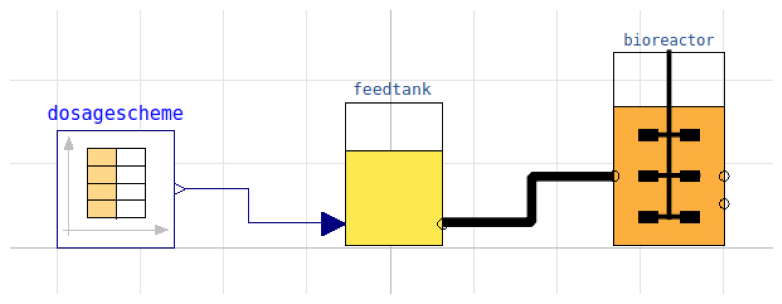

In [ ]:
process_diagram()

In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Reactor culture CHO-MAb - cell line HB-58 American Culture Collection ATCC



The molecular weight of the recombinant protein (MAb) is somewhat arbitrarly chosen and the value not used in the simulations.

In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.20
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: ME
 -Name: BPL_CHO.Fedbatch
 -Generated: 2024-03-06T12:05:46Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.2.0
 -Interaction: FMU-explore for FMPy version 1.0.0
